## Parsing unity VR log file using functions in the locproc module

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# If you want to import files from the parent directory, please add the directory to the path:
#import sys, os, inspect
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#sys.path.insert(0, os.path.dirname(parentdir))
#print(sys.path)

In [2]:
from unityvr.preproc import logproc
from unityvr.viz import viz

In [3]:
dirName = "/Users/hamida/Documents/Data/Fly_0005/A"
fileName = "Log_2025-06-30_14-35-30_fly_0005A.json"

dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    print(dat[i]['frame'])
    print(json.dumps(dat[i], sort_keys=True, indent=4))

0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "sessionParameters": [
        "ficTracSpinWindow: 0",
        "ficTracSpinThreshold: 0",
        "timeoutSecs: 1140",
        "backgroundCylinderTexture: C:\\Users\\hamida\\Desktop\\RF1_darkSpot10deg.png",
        "backgroundCylinderTexture2: "
    ],
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 720,
    "refreshRateHz": 120,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 480
}
1.0
{
    "ficTracBallRadius": 0.03999999910593033,
    "ficTracServerAddress": "127.0.0.1",
    "ficTracServerPort": 2000,
    "ficTracSmoothingCount": 1,
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
1.0
{
    "colliderType": "MeshCollider",
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "meshGameObjectPath": "Under",
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "worldPosition":

### Construct data object from log file
#### Extract header info

In [4]:
#print(dat[0]['headerNotes'])
logproc.makeMetaDict(dat, fileName)

{'expid': 'testExp',
 'experiment': 'test experiment',
 'genotype': 'testGenotype',
 'sex': 'NA',
 'flyid': 'NA',
 'trial': 'trial005A',
 'date': '2025-06-30',
 'time': '14-35-30',
 'ballRad': 0.03999999910593033,
 'translationalGain': 1.0,
 'setFrameRate': 120,
 'notes': 'NA',
 'temperature': 'NA',
 'angle_convention': 'right-handed'}

#### Pull out object positions as pandas dataframe

In [5]:
objDf = logproc.objDfFromLog(dat)
objDf.head()

,name,collider,px,py,pz,rx,ry,rz,sx,sy,sz
0,Under,MeshCollider,0.0,0.0,-100.0,0.0,0.0,0.0,500.0,500.0,500.0
1,BackgroundCylinder/default,NA,0.0,0.0,-1.94,0.0,0.0,0.0,-4.129,4.129,5.05
2,Fly/FlyCamera4/FlyCamera4Screen,MeshCollider,-1.275976,-3.927052,-1.9393,0.0,0.0,18.000004,6.000001,1.0,10.1
3,Fly/FlyCamera1/FlyCamera1Screen,MeshCollider,-1.275976,3.927051,-1.9393,0.0,0.0,162.0,6.0,1.0,10.1
4,Fly/FlyCamera2/FlyCamera2Screen,MeshCollider,3.340549,2.427051,-1.9393,0.0,0.0,234.0,6.0,1.0,10.1


#### Pull out fly position as pandas dataframe
Position in VR

In [6]:
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat)

correcting for Unity angle convention.


In [7]:
print(len(posDf))
posDf.head()

127209


,frame,time,dt,x,y,angle,dx_ft,dy_ft,dxattempt_ft,dyattempt_ft
0,1.0,0.000000,0.020000,0.006496,-10.006496,353.256788,0.006496,-0.006496,0.006496,-0.006496
1,2.0,0.020000,0.020000,0.012871,-10.005516,3.310638,0.006216,0.001722,0.006216,0.001722
2,3.0,0.028325,0.008325,0.012505,-10.005566,3.411224,-0.000368,-0.000028,-0.000368,-0.000028
3,4.0,0.036650,0.008325,0.012704,-10.005581,3.113342,0.000198,-0.000027,0.000198,-0.000027
4,5.0,0.044975,0.008325,0.012300,-10.005525,4.052704,-0.000401,0.000078,-0.000401,0.000078


In [8]:
tsDf['timenidaq'] = np.linspace(tsDf['time'].iloc[0], tsDf['time'].iloc[-1], len(tsDf))

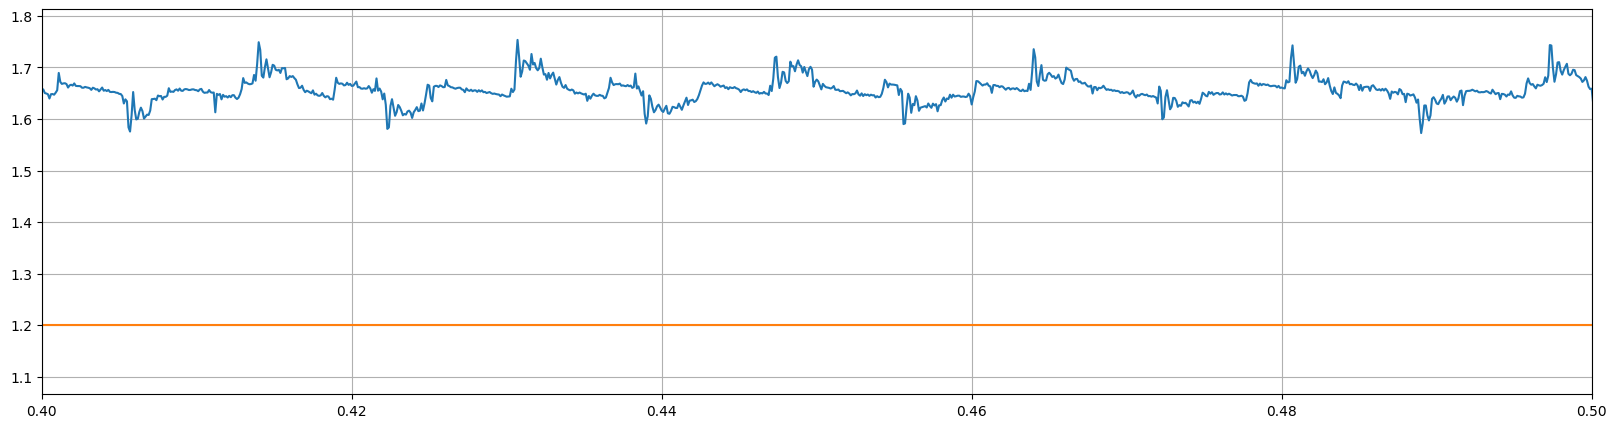

In [9]:
plt.figure(figsize = (20, 5))
import scipy as sp
#plt.plot(tsDf['timenidaq'], tsDf['pdsig'].values, '.'), 
plt.plot(tsDf['timenidaq'], tsDf['pdsig'].values), 
plt.plot(tsDf['timenidaq'], (tsDf['pdsig'].values>1.05)/10 + 1.1 ), 

plt.xlim([0.4, 0.5])
plt.grid(True)



([<matplotlib.axis.XTick at 0x41467de80>,
 [Text(0.44, 0, '0.440'),
  Text(0.441, 0, '0.441'),
  Text(0.442, 0, '0.442'),
  Text(0.443, 0, '0.443'),
  Text(0.444, 0, '0.444'),
  Text(0.445, 0, '0.445'),
  Text(0.446, 0, '0.446'),
  Text(0.447, 0, '0.447'),
  Text(0.448, 0, '0.448'),
  Text(0.449, 0, '0.449'),
  Text(0.45, 0, '0.450'),
  Text(0.451, 0, '0.451')])

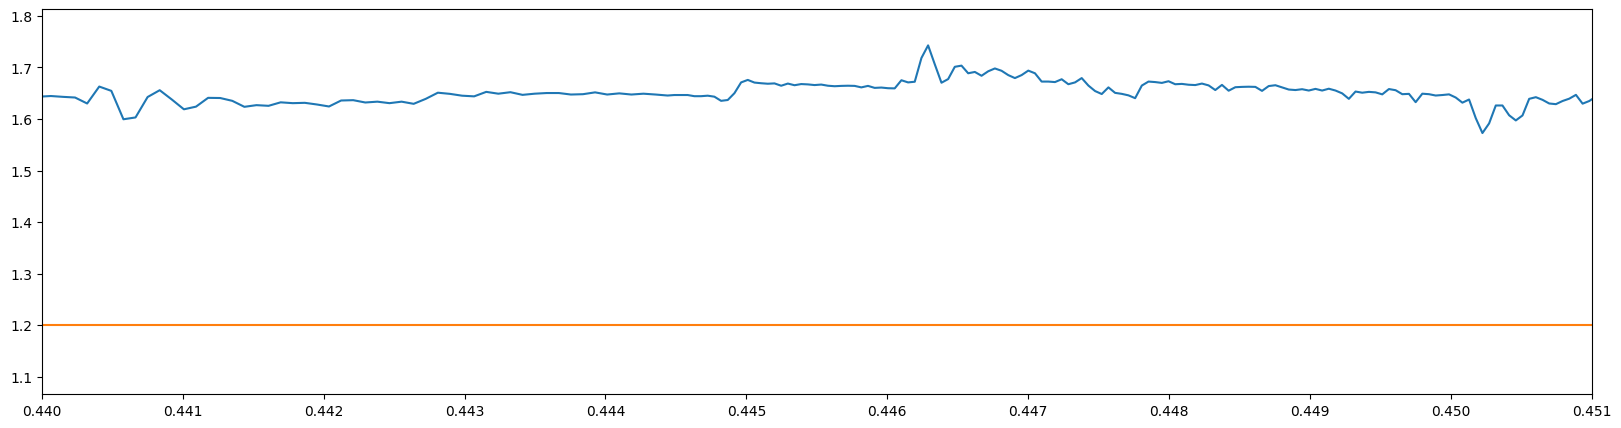

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(tsDf['timeinterp'].values, tsDf['pdsig'].values, label='pdsig')
plt.plot(tsDf['timeinterp'].values, (tsDf['pdsig'].values>1.05)/10 + 1.1 ), 
plt.xlim([0.44, 0.45])
xticks = np.arange(0.44, 0.451, 0.001)  
plt.xticks(xticks)




In [11]:
# Extract ball radius
matching = [s for s in dat if "ficTracBallRadius" in s]
ballRadius = matching[0]["ficTracBallRadius"]
print(ballRadius) # in decimeters

#conversion factor to cm
dc2cm = 10

0.03999999910593033


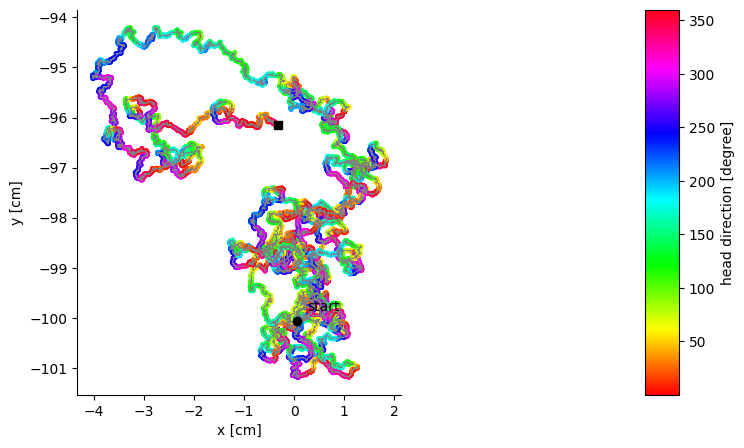

In [12]:
from unityvr.viz.utils import myAxisTheme

fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[20,1]})
axs[0].plot(posDf.x*dc2cm,posDf.y*dc2cm,color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm,posDf.y*dc2cm,s=5,c=posDf.angle, cmap='hsv')
axs[0].plot(posDf.x[0]*dc2cm,posDf.y[0]*dc2cm,'ok')
axs[0].text(posDf.x[0]*dc2cm+0.2,posDf.y[0]*dc2cm+0.2,'start')
axs[0].plot(posDf.x.values[-1]*dc2cm,posDf.y.values[-2]*dc2cm,'sk')
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
myAxisTheme(axs[0])
plt.colorbar(cb,cax=axs[1], label='head direction [degree]')

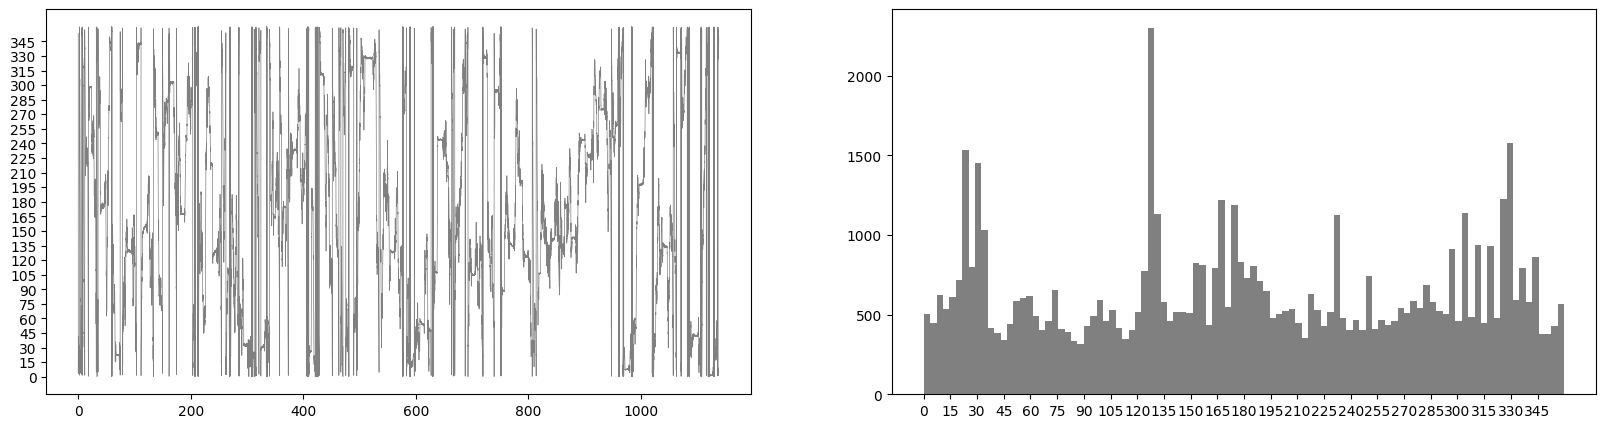

In [13]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(posDf.time,posDf.angle,color='grey', linewidth=0.5)
axs[0].set_yticks(np.arange(0, 360, 15));
axs[1].hist(posDf.angle[0:round(len(posDf.angle)/2)],color='grey', bins=100)
axs[1].set_xticks(np.arange(0, 360, 15));

In [ ]:
#posDf['dx'] = posDf.x.diff()
#posDf['dy'] = posDf.y.diff()
#posDf['dt'] = posDf.time.diff()  # or h

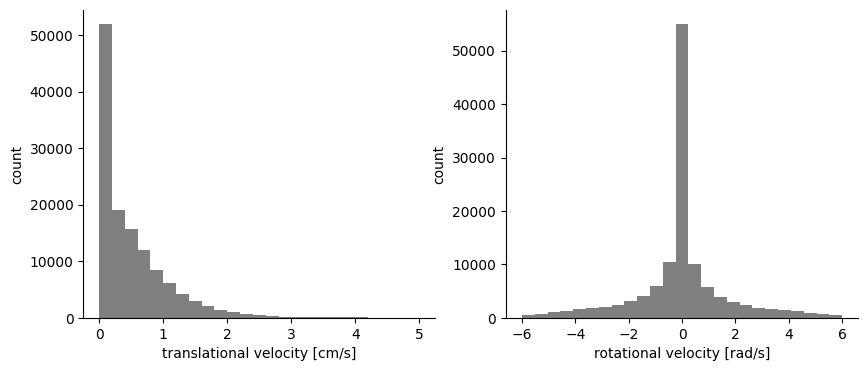

In [14]:
vt = np.hypot(posDf.dx_ft*dc2cm, posDf.dy_ft*dc2cm)/posDf.dt
vr = np.diff(posDf.angle*np.pi/180)/posDf.dt[1:]
fig, axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw={'width_ratios':[1,1]})
axs[0].hist(vt,color='grey',bins=25, range=(0,5));
axs[0].set_xlabel('translational velocity [cm/s]')
axs[0].set_ylabel('count')
axs[1].hist(vr,color='grey',bins=25,range=(-6,6));
axs[1].set_xlabel('rotational velocity [rad/s]')
axs[1].set_ylabel('count')
for ax in axs:
    myAxisTheme(ax)

Position based on Fictrac tracking

In [15]:
print(len(ftDf))
ftDf.head()

95248


,frame,ficTracTReadMs,ficTracTWriteMs,wx_ft,wy_ft,wz_ft
0,1.0,0.0,0.0,-0.009028,-0.013975,-0.004136
1,1.0,18.0,0.0,-0.005312,-0.011935,-0.007792
2,1.0,35.0,0.0,-0.006012,0.000165,-0.013778
3,1.0,45.0,0.0,0.005051,0.008712,-0.022903
4,1.0,54.0,0.0,-0.017450,0.015325,-0.000580


Photodiode signal and frame rate dataframe

In [16]:
print(len(tsDf))
tsDf.head()

11386408


,frame,time,dt,pdsig,imgfsig,pdFilt,framestart,counts,frameinterp,timeinterp,timenidaq
0,1.0,0.00,0.02,NaN,NaN,NaN,0,1,1.000000,0.000000,0.0000
1,2.0,0.02,0.02,1.660934,0.884805,1.652883,1,1,2.000000,0.020000,0.0001
2,2.0,0.02,0.02,1.652883,1.230037,1.652883,0,1,2.002841,0.020024,0.0002
3,2.0,0.02,0.02,1.647086,1.416180,1.647730,0,1,2.005682,0.020047,0.0003
4,2.0,0.02,0.02,1.647730,1.516980,1.647086,0,1,2.008523,0.020071,0.0004


In [17]:
framesDf = tsDf[['frame','time','dt']].drop_duplicates().reset_index(level=0)[['frame','time','dt']]

In [18]:
framesDf.head()

,frame,time,dt
0,1.0,0.000000,0.020000
1,2.0,0.020000,0.020000
2,3.0,0.028325,0.008325
3,4.0,0.036650,0.008325
4,5.0,0.044975,0.008325


In [19]:
posDf['time'].max()

1138.6143798828125

Fictrac updates come in at a higher rate than the VR frame rate. Fictrac can also only run for a subset of the VR run time and therefore the number of frames in fictrac and vr dataframes may not match.

#### Frame rate

In [20]:
# Extract frame rate setting
matching = [s for s in dat if "refreshRateHz" in s]
forceframerate = matching[0]["refreshRateHz"]
print(forceframerate) # frame rate in Hz

120


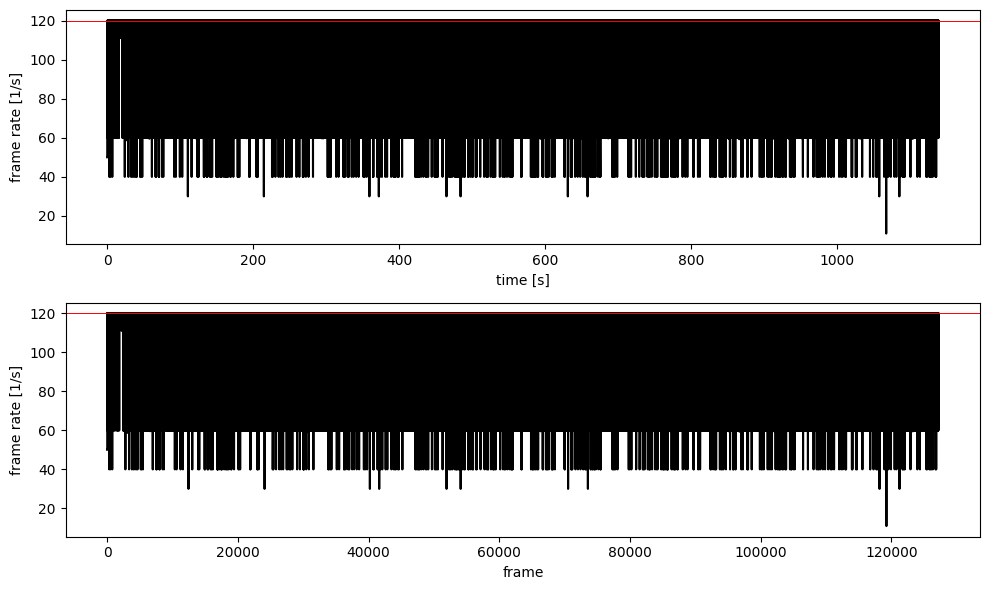

In [21]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(framesDf.time, 1/framesDf.dt, 'k')
ax[1].plot(framesDf.frame, 1/framesDf.dt, 'k')
ax[0].set_xlabel('time [s]')
ax[1].set_xlabel('frame');
for i in range(2):
    ax[i].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[i].set_ylabel('frame rate [1/s]')
fig.tight_layout()

#####  Note: The remaining visuzalizations require that an analog photodiode signal was recorded. 

In [22]:
print(tsDf.head())
print(tsDf.columns)
print(len(tsDf))

   frame  time    dt     pdsig   imgfsig    pdFilt  framestart  counts  \
0    1.0  0.00  0.02       NaN       NaN       NaN           0       1   
1    2.0  0.02  0.02  1.660934  0.884805  1.652883           1       1   
2    2.0  0.02  0.02  1.652883  1.230037  1.652883           0       1   
3    2.0  0.02  0.02  1.647086  1.416180  1.647730           0       1   
4    2.0  0.02  0.02  1.647730  1.516980  1.647086           0       1   

   frameinterp  timeinterp  timenidaq  
0     1.000000    0.000000     0.0000  
1     2.000000    0.020000     0.0001  
2     2.002841    0.020024     0.0002  
3     2.005682    0.020047     0.0003  
4     2.008523    0.020071     0.0004  
Index(['frame', 'time', 'dt', 'pdsig', 'imgfsig', 'pdFilt', 'framestart',
       'counts', 'frameinterp', 'timeinterp', 'timenidaq'],
      dtype='object')
11386408


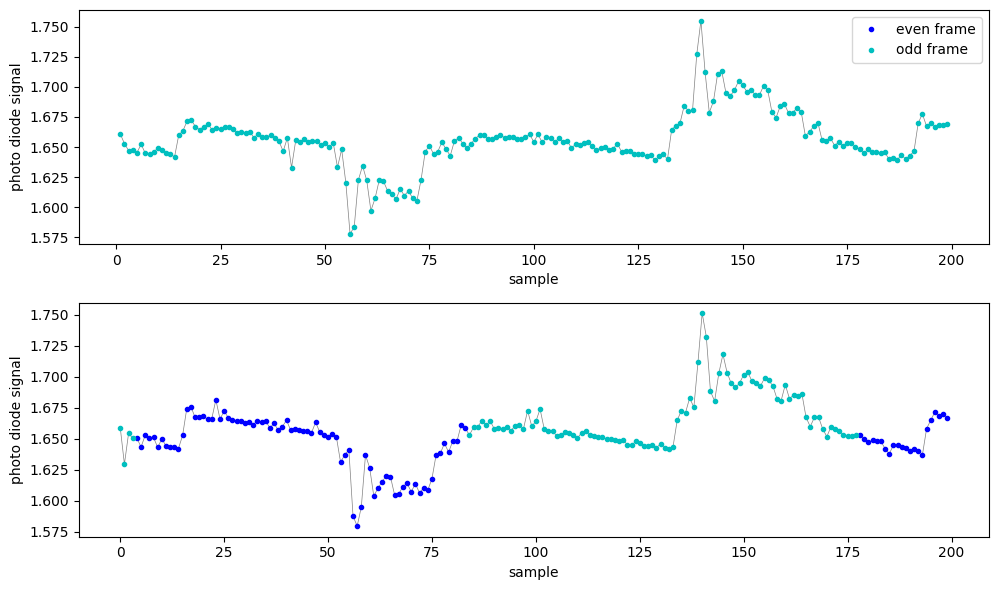

In [23]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(2,1, figsize=(10,6))
    window = 200
    for i, ts in enumerate([0,5000]):
        ax[i].plot(range(window),tsDf.pdsig[ts:ts+window],'-',color='grey',linewidth=0.5)

        even = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==1]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==1], even.pdsig, 'b.', label='even frame')

        odd = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==0]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==0], odd.pdsig, 'c.', label=
                  'odd frame')

        ax[i].set_xlabel('time [s]')
        ax[i].set_ylabel('photo diode signal')
        ax[i].set_xlabel('sample');
    ax[0].legend()
    fig.tight_layout()

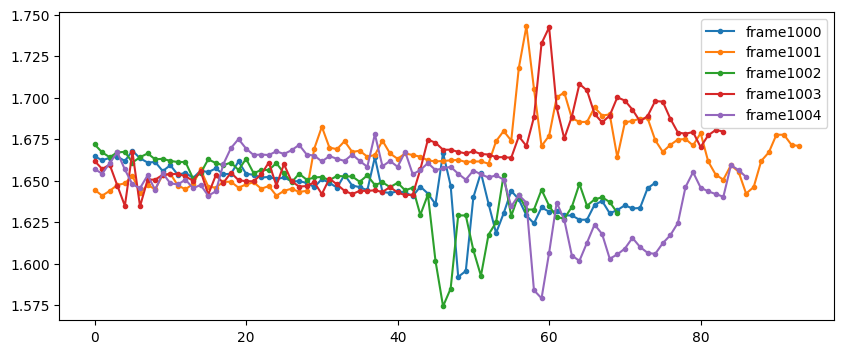

In [24]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    for f in range(1000, 1005):
        sig = tsDf.query('frame == '+str(float(f)))
        ax.plot(range(len(sig.pdsig)), sig.pdsig, '.-',  label='frame{}'.format(f))
    ax.legend()

Compute frame rate from photodiode signal

In [25]:
if "pdsig" in tsDf.columns:
    from scipy.signal import medfilt

    tsDf["pdFilt"]  = tsDf.pdsig.values
    tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])
    tsDf["pdThresh"]  = 1*(np.asarray(tsDf.pdFilt>=0.2+np.nanmedian(tsDf.pdFilt.values)))

/var/folders/nz/36wz0cz90t34jt3ryz6_n08w0000gp/T/ipykernel_50044/1790617142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])


Generate interpolated time

In [26]:
from scipy import interpolate

tsDf['framestart'] = np.hstack([0,1*np.diff(tsDf.time)>0])

tsDf['counts'] = 1
sampperframe = tsDf.groupby('frame').sum()[['time','dt','counts']].reset_index(level=0)
sampperframe['fs'] = sampperframe.counts/sampperframe.dt

frameStartIndx = np.hstack((0,np.where(tsDf.framestart)[0]))
frameStartIndx = np.hstack((frameStartIndx, frameStartIndx[-1]+sampperframe.counts.values[-1]-1))
frameIndx = tsDf.index.values

frameNums = tsDf.frame[frameStartIndx].values.astype('int')
frameNumsInterp = np.hstack((frameNums, frameNums[-1]+1))

timeAtFramestart = tsDf.time[frameStartIndx].values

#generate interpolated frames
frameinterp_f = interpolate.interp1d(frameStartIndx,frameNums)
tsDf['frameinterp'] = frameinterp_f(frameIndx)

timeinterp_f = interpolate.interp1d(frameStartIndx,timeAtFramestart)
tsDf['timeinterp'] = timeinterp_f(frameIndx)

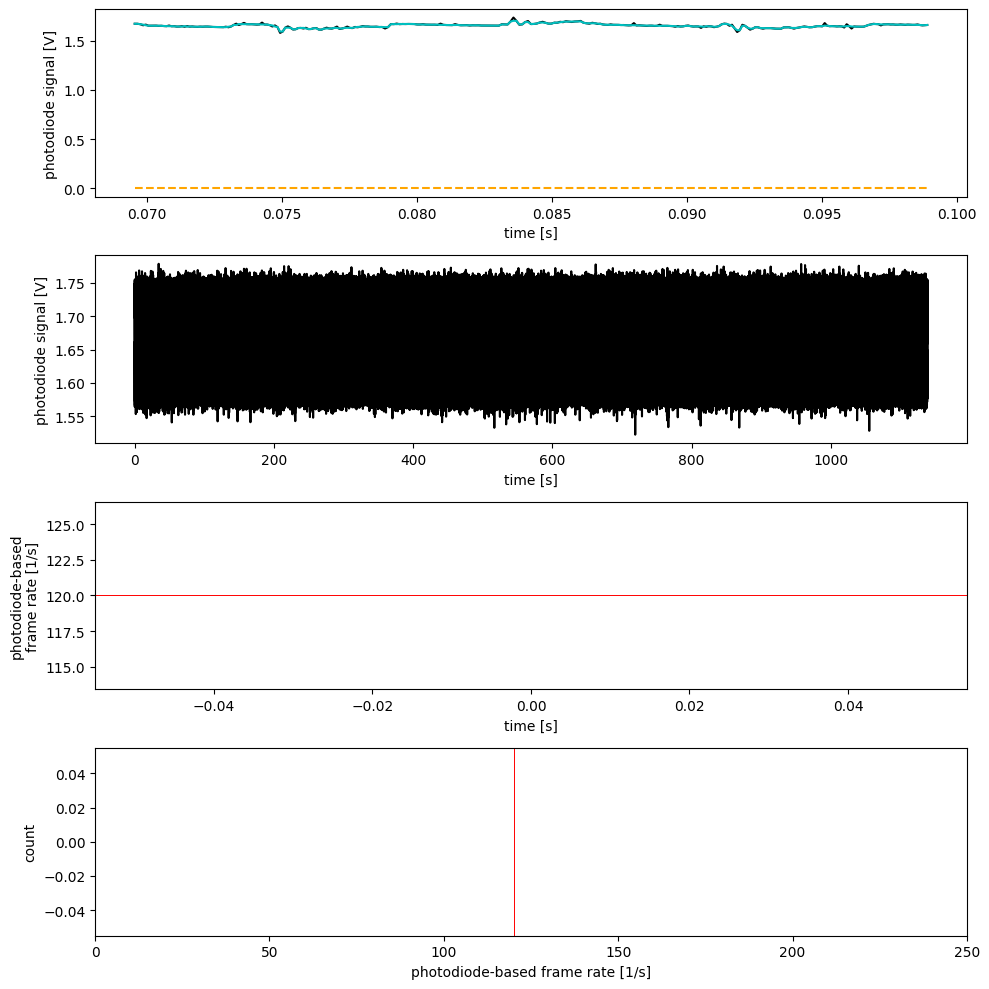

In [27]:
if "pdsig" in tsDf.columns:
    fig, ax = plt.subplots(4,1, figsize=(10,10))
    ts = 1000
    wind = 300
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdsig[ts:ts+wind], 'k')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdFilt[ts:ts+wind], 'c')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdThresh[ts:ts+wind], '--',color='orange')
    ax[0].set_ylabel('photodiode signal [V]')
    ax[0].set_xlabel('time [s]')

    pdChange = np.hstack((0,np.diff(tsDf.pdThresh)))
    pdChangeT = tsDf.timeinterp.values[abs( pdChange )>0]

    ax[1].plot(tsDf.timeinterp, tsDf.pdsig, 'k')
    #ax[1].set_ylim(0,250)
    ax[1].set_xlabel('time [s]')
    ax[1].set_ylabel('photodiode signal [V]')

    ax[2].plot(pdChangeT[1:], 1/np.diff(pdChangeT), '.', color='grey')
    #ax[2].set_ylim(0,250)
    ax[2].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[2].set_xlabel('time [s]')
    ax[2].set_ylabel('photodiode-based\nframe rate [1/s]')

    ax[3].hist(1/np.diff(pdChangeT), 100, color='grey')
    ax[3].set_xlim(0,250)
    ax[3].axvline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[3].set_ylabel('count')
    ax[3].set_xlabel('photodiode-based frame rate [1/s]')

    fig.tight_layout()

In [28]:
counts = tsDf.groupby('frame').count()['pdsig'].values.astype('float')
counts[counts == 0] = float('NaN')
fr = 1/(counts/2000)

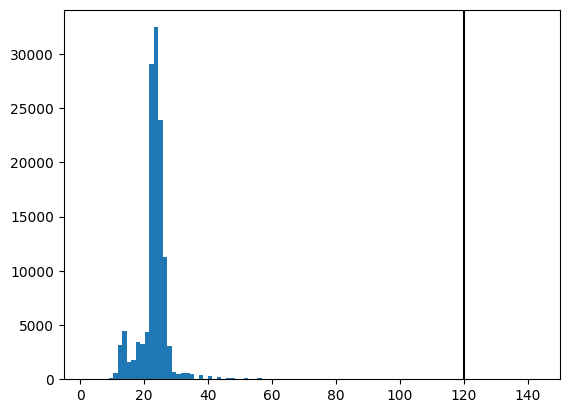

In [29]:
plt.hist(fr, bins = 100)
plt.axvline(120, color = 'k')

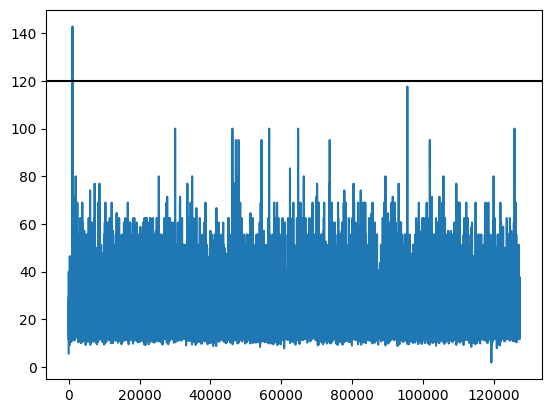

In [30]:
plt.plot(fr)
plt.axhline(120, color = 'k')
#plt.xlim(0, 600)

(0.0, 1000.0)

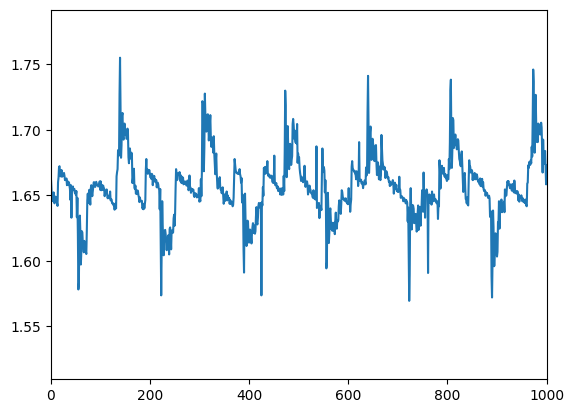

In [31]:
plt.plot(tsDf['pdsig'].values)
plt.xlim([0, 1000])
#plt.plot(tsDf['framestart'].values, 'o')

(1000.0, 2000.0)

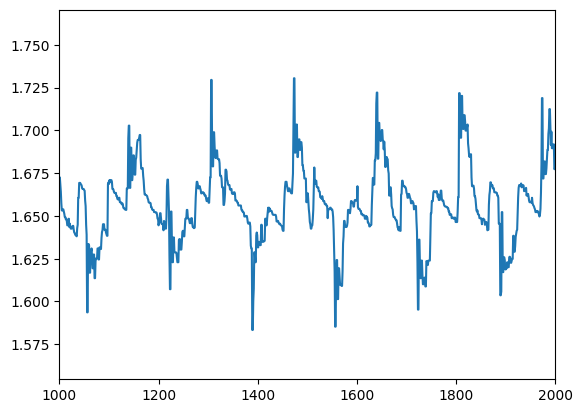

In [32]:
plt.plot(tsDf['pdFilt'].values)
plt.xlim([1000, 2000])

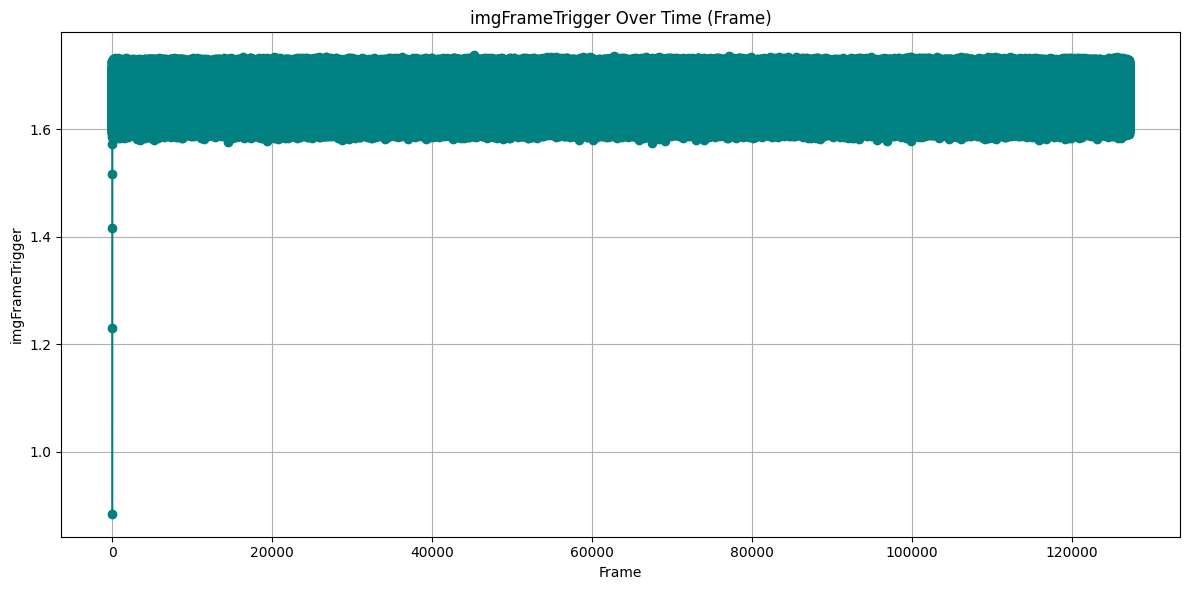

In [33]:
# Load logfile
dat = logproc.openUnityLog(dirName, fileName)

# Extract frame and imgFrameTrigger
frames = []
triggers = []

for entry in dat:
    if 'imgFrameTrigger' in entry:
        frames.append(entry.get('frame', np.nan))
        triggers.append(entry['imgFrameTrigger'])

# Create DataFrame
df = pd.DataFrame({'frame': frames, 'imgFrameTrigger': triggers})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['frame'], df['imgFrameTrigger'], marker='o', linestyle='-', color='teal')
plt.xlabel('Frame')
plt.ylabel('imgFrameTrigger')
plt.title('imgFrameTrigger Over Time (Frame)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    entry = dat[i]
    if 'imgFrameTrigger' in entry:
        print("imgFrameTrigger:", entry['imgFrameTrigger'])
    else:
        print("imgFrameTrigger: Not present")

    print(json.dumps(entry, sort_keys=True, indent=4))


imgFrameTrigger: Not present
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "sessionParameters": [
        "ficTracSpinWindow: 0",
        "ficTracSpinThreshold: 0",
        "timeoutSecs: 1140",
        "backgroundCylinderTexture: C:\\Users\\hamida\\Desktop\\RF1_darkSpot10deg.png",
        "backgroundCylinderTexture2: "
    ],
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
imgFrameTrigger: Not present
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 720,
    "refreshRateHz": 120,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 480
}
imgFrameTrigger: Not present
{
    "ficTracBallRadius": 0.03999999910593033,
    "ficTracServerAddress": "127.0.0.1",
    "ficTracServerPort": 2000,
    "ficTracSmoothingCount": 1,
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
imgFrameTrigger: Not present
{
    "colliderType": "MeshCollider",
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "mes

In [35]:
img_trigger_entries = [entry for entry in dat if 'imgFrameTrigger' in entry]
print(f"Total entries with imgFrameTrigger: {len(img_trigger_entries)}")

Total entries with imgFrameTrigger: 11386407


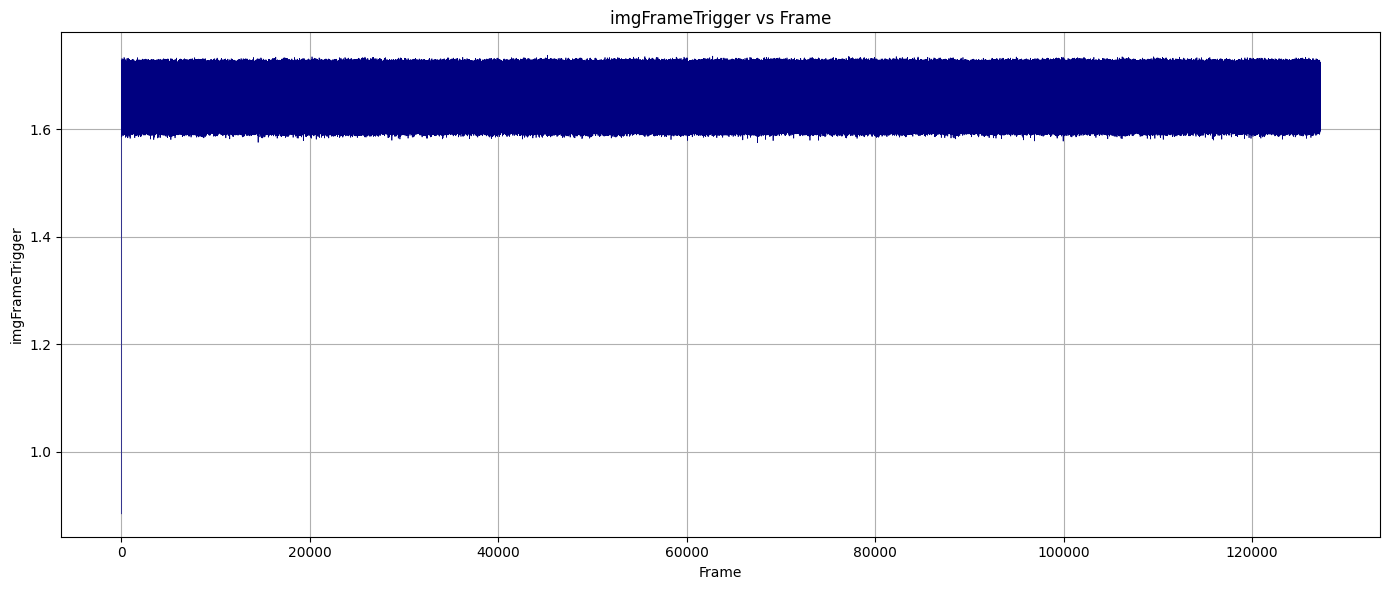

In [36]:
frames = []
triggers = []

for entry in dat:
    if 'imgFrameTrigger' in entry:
        frames.append(entry.get('frame', np.nan))
        triggers.append(entry['imgFrameTrigger'])

plt.figure(figsize=(14, 6))
plt.plot(frames, triggers, linestyle='-', color='navy', linewidth=0.5)
plt.xlabel('Frame')
plt.ylabel('imgFrameTrigger')
plt.title('imgFrameTrigger vs Frame')
plt.grid(True)
plt.tight_layout()
plt.show()

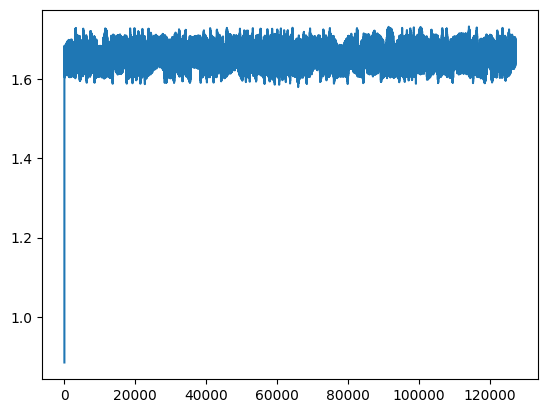

In [37]:
# Plot every 100th entry for clarity
plt.plot(frames[::100], triggers[::100])